# **Housing price prediction using linear regression**
(*Regularised Gradient Descent and Regularised Normal equation*)

---





In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


1.   *Delete unnecessary column*
2.   *Normalised the data with mean*


In [47]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Housing Price data set.csv')

# Drop unnecessary columns
data = data.drop(['Unnamed: 0','driveway','recroom','fullbase','airco','prefarea', 'gashw'], axis=1)

# Compute the mean and stddev
mean = data.mean().iloc[0]  # Use .iloc to access the first value by position
stddev = data.std().iloc[0]  # Use .iloc to access the first value by position

# Normalize the data
data = (data - data.mean()) / data.std()

# Display the first few rows of the processed data
data.head()


,price,lotsize,bedrooms,bathrms,stories,garagepl
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


# New Section


3.   *Separate out the Feature and Target matrices
and divide test and train data with 0.9 split ratio*







In [28]:

data=np.asarray(data)
Y=data[:,0:1]
X=data[:,1:]
one = np.ones((len(X),1))
X = np.concatenate((one,X),axis=1)
split_ratio = 0.9
split = int(split_ratio * X.shape[0])
X_test = X[split+1:,:]
X_train = X[:split+1, :]
Y_test = Y[split+1:,:]
Y_train = Y[:split+1, :]

4. *Compute cost function*
5. *denormalise price funcion*
6. *compute error function*
7. *plot graph function*

In [29]:
# helper Functions
def computeCost(X,y,theta,lam):
    tobesummed = np.power(((X.dot(theta.T))-y),2)+lam*np.sum(np.power(theta,2))
    return np.sum(tobesummed)/(2 * len(X))

def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev + mean
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        error += abs(actual[i] - predicted[i]) / actual[i]
    error /= len(actual)
    return error[0]

def plotGraph(x,y,labelX='X',labelY='Y',title='X vs Y'):
  fig, ax = plt.subplots()
  ax.plot(x, y, 'r')
  ax.set_xlabel(labelX)
  ax.set_ylabel(labelY)
  ax.set_title(title)

7. *Gradient descent with regularisation to find minimum theta*

In [30]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha, lam):
    lam_matrix = lam * np.ones(theta.shape)
    lam_matrix[0][0] = 0
    for i in range(iters):
        theta = theta*(1- lam_matrix / len(X)) - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)

    return theta

7. *Normal eqution function with regularisation to find minimum theta*

In [31]:
#Normal equation
def normalEquation(X,Y,lam):
    lam_matrix = lam * np.identity(X.shape[1])
    lam_matrix[0][0] = 0
    theta = np.linalg.inv(X.T.dot(X) + lam_matrix).dot(X.T).dot(Y)
    return theta


8. *Train the model with train data and predict the test data using gradient descent*
9. *compute the minimum error and lambda*
10. *plot error vs lambda graph*

min Error  :  13.960611355440056 %
Optimal Lambda :  24


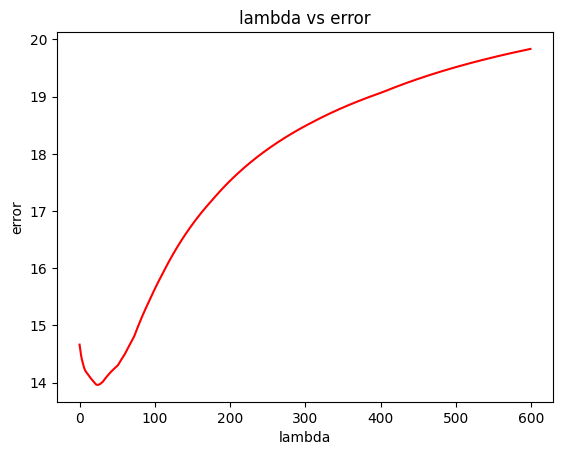

In [32]:
theta = np.zeros([1,X.shape[1]])
alpha = .1 #learning rate
iters = 500 #epoch
error_matrix = []
lam_range = 600 #maximam lamda
for lam in range(lam_range):
    g = gradientDescent(X_train,Y_train,theta,iters,alpha, lam)
    Cost = computeCost(X_train,Y_train,g,lam)

    Y_pred = X_test.dot(g.T)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_matrix.append(error*100)
optimal_lambda = 0
min_error = 9999
for i in range(len(error_matrix)):
    if error_matrix[i] < min_error:
        optimal_lambda = i
        min_error = error_matrix[i]

print("min Error  : ", (min_error),'%')
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_matrix,'lambda','error','lambda vs error')

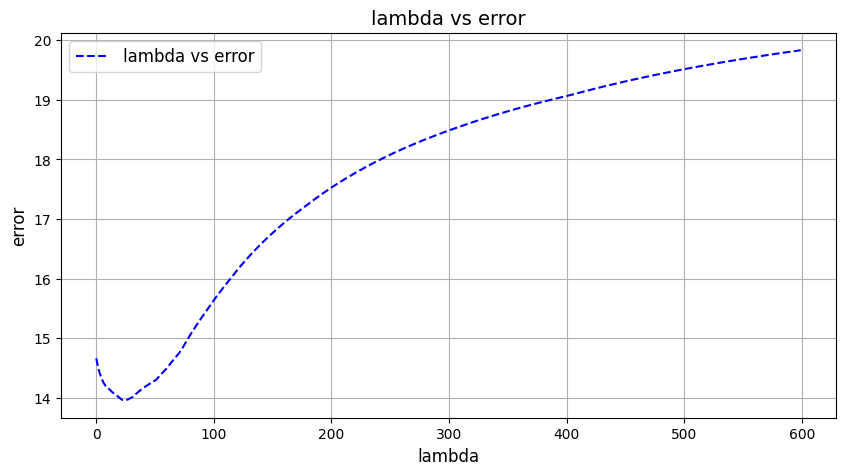

In [33]:

def plotGraph(x, y, xlabel, ylabel, title, line_style='-', line_color='blue'):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, line_style, color=line_color, label=title)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()


plotGraph(
    np.arange(lam_range), error_matrix,
    'lambda', 'error', 'lambda vs error',
    line_style='--',  # Dashed line
    line_color='blue'  # Line color
)


In [34]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2][0]))

pred price = 64257.57664950318 actual price = 58500.0


11. *Train the model with train data and predict the test data using Normal Equation*
12. *compute the minimum error and lambda*
13. *plot error vs lambda graph*

min Error :  13.432288061521582
Optimal Lambda :  311


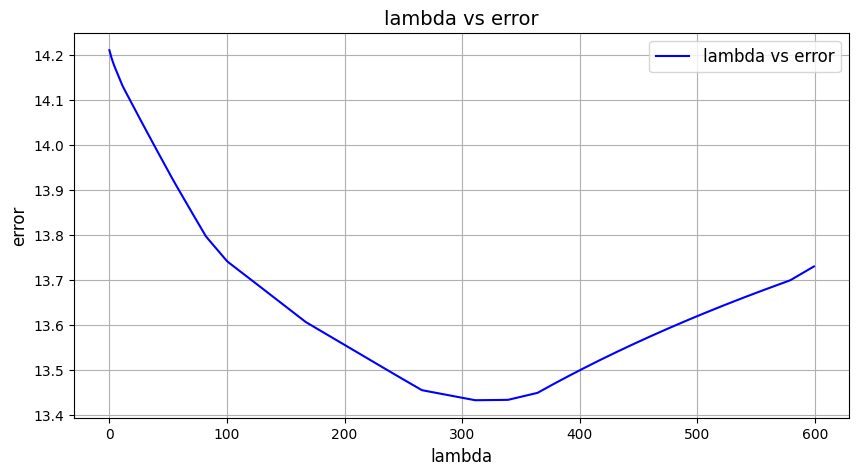

In [35]:
error_mat = []
lam_range = 600

for lam in range(lam_range):
    theta = normalEquation(X,Y,lam)
    Cost = computeCost(X_train,Y_train,theta.T,lam)
    Y_pred = X_test.dot(theta)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_mat.append(error*100)

optimal_lambda = 0
min_error = 9999
for i in range(len(error_mat)):
    if error_mat[i] < min_error:
        optimal_lambda = i
        min_error = error_mat[i]
print("min Error : ", min_error)
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_mat,'lambda','error','lambda vs error')

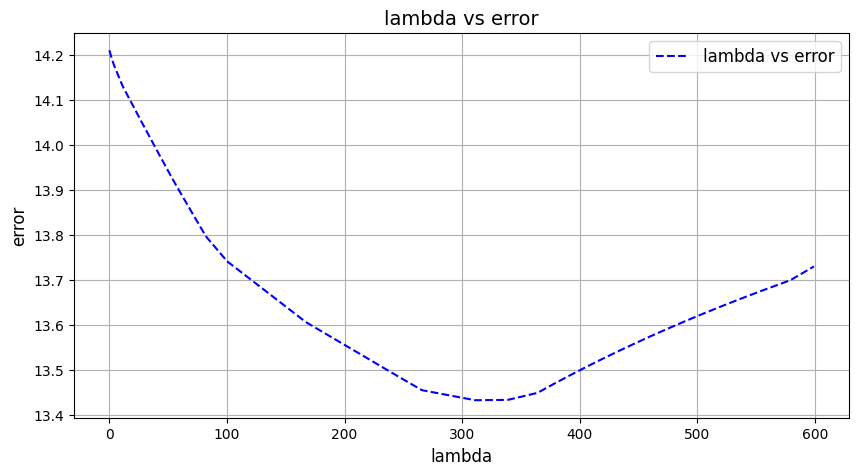

In [36]:

def plotGraph(x, y, xlabel, ylabel, title, line_style='-', line_color='blue'):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, line_style, color=line_color, label=title)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()


plotGraph(
    np.arange(lam_range), error_mat,
    'lambda', 'error', 'lambda vs error',
    line_style='--',  # Dashed line style
    line_color='blue'  # Blue line color
)


In [37]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2])[0])

pred price = 57100.426317244695 actual price = 58500.0


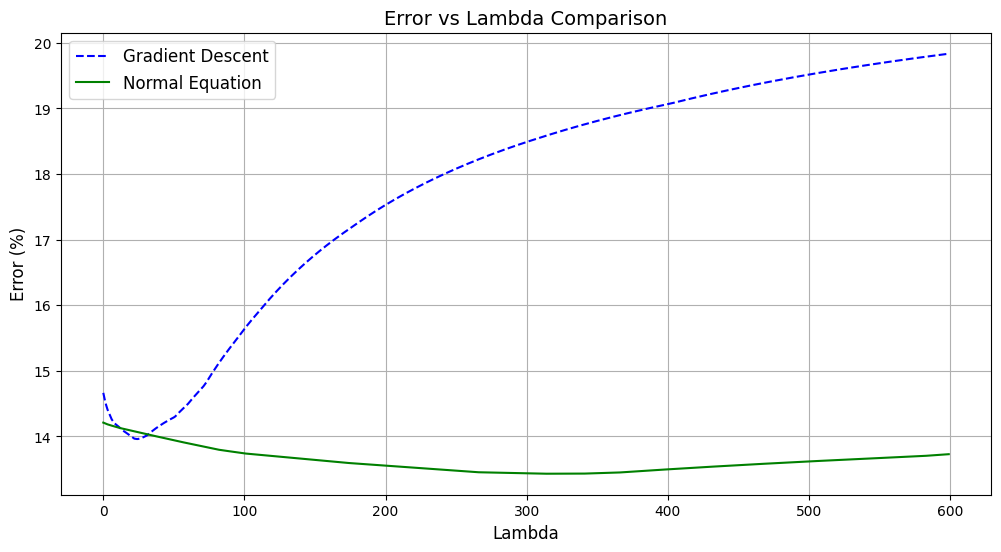

In [38]:
plt.figure(figsize=(12, 6))

# Plot for Gradient Descent
plt.plot(np.arange(lam_range), error_matrix, label='Gradient Descent', linestyle='--', color='blue')

# Plot for Normal Equation
plt.plot(np.arange(lam_range), error_mat, label='Normal Equation', linestyle='-', color='green')

plt.title('Error vs Lambda Comparison', fontsize=14)
plt.xlabel('Lambda', fontsize=12)
plt.ylabel('Error (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
